In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Basics of Support Vector Machines (SVMs)

## A Note on Residuals

Residuals measure the distance between predicted values and true values, where true values are usually measured data points. (Unfortunately, the term "residuals" is also used interchangeably with "errors" *sometimes*. Othertimes, they're not interchangeable. :/) There are many ways that residuals can be calculated. Standard regression uses squared errors/residuals: $ (y_{predicted} - y_{true})^2 $. On a graph, the residuals look like this:

In [3]:
x_line = np.arange(7)
y_line = np.arange(7)
x = np.arange(1,6)
y = [.5, 2.6, 3.9, 3.55, 5.4]
x_resid = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
resids = np.array([list(y_line[1:6]), y])

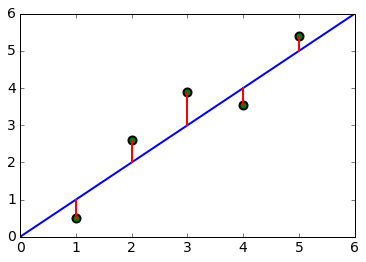

In [4]:
plt.plot(x_line, y_line, '-', x, y, 'o', x_resid.T, resids, '-r')

For support vector machines, the residual is the vector difference between the true value vector and the orthogonal projection of the true value onto the predicted function (a vector that connects the predicted and true values which is also orthogonal to the predicted function).
<img src="proj.png">

Mathematically, if the predicted function is spanned by $\vec{s}$, and the true value is represented by $\vec{v}$, then the projection of $\vec{v}$ onto the line is:
$$ proj_{\vec{s}} (\vec{v}) = \vec{c}_{\vec{p}}\vec{s} = \frac{\vec{v} \cdot \vec{s}} {\vec{s} \cdot \vec{s}} \vec{s} $$
and the residual is 
$$ \vec{v} - \vec{c}_{\vec{p}}\vec{s} $$
Here's what all this looks like visually:
<img src="https://upload.wikimedia.org/wikipedia/commons/1/17/Linalg_projection_4.png" width="30%" height="30%">

## Classification Problem

Say you have two classes that can be mapped in 2D. You want to create a boundary that separates the two classes. So how do you choose your boundary? Well, if we want an accurate classifier, it makes sense that we should maximize the distance between the classes. In other words, we need a boundary that maximizes the distance between the points closest to it.
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width="40%" height="40%">

$\vec{w}$ is the normal (orthogonal) vector of the line. It's used to normalize the margin lines (the dotted lines). That means the actual distance between the margin lines is $\frac{2}{\lVert\vec{w}\rVert}$. So, maximizing the distance is the same as minimizing $\lVert\vec{w}\rVert$. But, we also want to make sure none of the points are in this margin layer. If we represent the $y_i$ points as +1 and -1, then our constraint can be written as $y_i(\vec{w}\cdot\vec{x} - b) > 1$. This type of problem has a known solution (a quadratic programming problem, to be exact). Yay!

**Note:** This example is 2D data separated by a 1D linear boundary, but this works for any nD data that you want to separate with an (n-1)D linear boundary.

## Wait! What if I need a non-linear boundary?

Don't need one.

This is where kernels come in. Kernels are transforms that you apply to your data so that the transformed data can be separated by a linear boundary. Once you have the linear boundary, you untransform it to get your non-linear boundary for the original data.
<img src="https://media.licdn.com/mpr/mpr/p/1/005/097/185/267ca63.jpg">

**Note:** Sometimes, kernels will actually *increase* the dimension of your data. This is obviously going to be computationally expensive, so SVM is often a last resort.

## What's a slack variable?

The constraint we defined above states that absolutely NO data points can be in the margin layer. This is called a hard margin. But real life is messy, so sometimes you need to cut the algorithm some slack and let some data points into the margin layer. This is called a soft margin. These data points get penalized depending on how far from the margin they are, very much like for regularization. Also like with regularization, there is a parameter that balances maximizing the margin with keeping points out of the margin layer. This is the slack variable. It's often notated as $\xi$...because it's wiggle room?

The math involved in this is complicated and out of scope.

## Regression Problem

SVMs can also be used for regression, but the problem is framed in a very specific way. First, the margin constraint is reversed: In classification, you care about points on the margin and within it. In regression, you care about points outside the margin. The problem is to find the flattest boundary that minimizes the squared residuals to the margin line. Points within the margin are ignored.
<img src="http://www.saedsayad.com/images/SVR_2.png">

Just to complicate things even more, they thrown in an $\varepsilon$ parameter for the width instead of normalizing. Often, this problem is not solvable without adding in a slack variable.

The math here is even more complicated and definitely out of scope.

# SVMs in sklearn.svm

There are four main classes for SVMs in sklearn.svm:
* ```SVC()```
* ```NuSVC()```
* ```SVR()```
* ```NuSVR()```  

```SVC()``` and ```SVR()``` are the problems we talked about above, with C serving as the regularization parameter for the slack variables. ```NuSVC()``` and ```NuSVR()``` use $\nu$ as the regularization parameter instead of C. $\nu$ provides an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. So a value of 0.5 means that at least half of the data points are support vectors. It's just a reparameterization of the problem that gives you more control over the number of support vectors. The other classes are just derivatives, such as ```LinearSVC()```, which is ```SVC()``` with a linear kernel.

The kernels themselves have their own quirks and associated parameters. You can look them all up <a href="http://scikit-learn.org/stable/modules/svm.html#kernel-functions">here</a>. You can also create custom kernels!

Since the choice of C or $\nu$ doesn't change the function inputs much, I'll only use C for the examples.

In [5]:
from sklearn import svm, datasets

## ```SVC()```
Using the sklearn example <a href="http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html">here</a>.

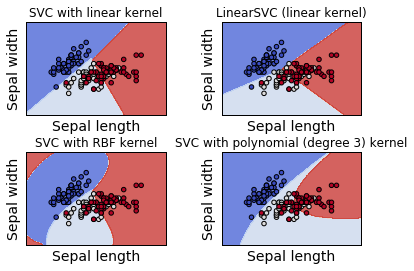

In [6]:
iris = datasets.load_iris() # yay iris dataset!
X = iris.data[:, :2] # sepal length and sepal width
y = iris.target # species

h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter

# create SVC model objects, then use the fit method to fit the models to the data
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) #gaussian kernel (needs a gamma parameter)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y) #polynomial kernel of degree three
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# the rest of this is plotting
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

## ```SVR()```
Using the sklearn example <a href="http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html">here</a>.

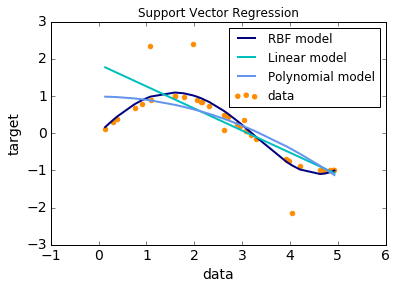

In [7]:
# making up data this time
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

#add noise
y[::5] += 3 * (0.5 - np.random.rand(8))

# create the model objects
svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)  #gaussian kernel (needs a gamma parameter)
svr_lin = svm.SVR(kernel='linear', C=1e3)
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2) #polynomial kernel of degree 2

# fit the data and get predictions
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

#plot
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()